In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sys
sys.path.append("..")

In [18]:
from src.data.helpers import create_sentences, join_mentor_to_mentees,\
                         get_name_dict, get_index
from src.models.predict_model import bert

/Users/andresgarcia/Documents/projects/match.mentor/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# read mentor and mentee file
mentors_df = pd.read_csv('../data/raw/List of Mentors.csv')
mentees_df = pd.read_csv('../data/raw/List of Mentees.csv')

In [22]:
print(f"There are {mentors_df.shape[0]} mentors and {mentees_df.shape[0]} mentees")

There are 9 mentors and 3 mentees


In [24]:
# generate sentence for mentors
sentences_mentors = create_sentences(mentors_df)
sentences_mentors

['Maria Perez - Structural engineer with over a decade of experience, specializing in space systems. My expertise revolves around ensuring the safety and integrity of these intricate structures, making me a crucial contributor to the world of space exploration. - Portland, OR',
 "Mark Vargas - I'm Mark, a mechanical engineer with 5 years of experience in the manufacturing industry. I'm proud to have graduated from the University of Alabama, where I honed my engineering skills. My expertise lies in optimizing manufacturing processes and ensuring efficiency in production. - Linthicum, MD",
 "Joe Pulisic - I'm Joe, a business manager with a passion for cost reduction strategies. I hold an MBA from Harvard University, where I gained a solid foundation in business management. My primary focus is on finding innovative ways to reduce costs and improve efficiency within organizations. Outside of the business world, I'm an avid rock climber, always seeking new challenges on the mountainside. - 

In [25]:
# generate sentences for mentees
sentences_mentees = create_sentences(mentees_df)
sentences_mentees

["Juniper Berry - I'm Juniper Berry, an entry-level mechanical engineer hailing from West Virginia. My passion lies in space systems, and I'm eager to embark on a career dedicated to exploring the cosmos. With a strong educational background and a deep fascination for all things related to space, I'm determined to contribute to the exciting field of aerospace engineering and push the boundaries of human exploration. - Space Park, CA",
 "Francisco Clearwater - I'm Francisco Clearwater, originally from Denver, Colorado. My academic background is in civil engineering, but my interests extend beyond the realm of engineering. I'm deeply intrigued by business management and its intricate dynamics. My journey is a fusion of analytical thinking and strategic vision, as I aim to bridge the gap between engineering expertise and effective business leadership. - Denver, Colorado",
 "Marta Lopez - I'm Marta Diaz, currently pursuing a cybersecurity program at Harvard University. My academic journey 

In [26]:
# add mentor to mentees
sentences = join_mentor_to_mentees(sentences_mentors, sentences_mentees)
sentences

[['Maria Perez - Structural engineer with over a decade of experience, specializing in space systems. My expertise revolves around ensuring the safety and integrity of these intricate structures, making me a crucial contributor to the world of space exploration. - Portland, OR',
  "Juniper Berry - I'm Juniper Berry, an entry-level mechanical engineer hailing from West Virginia. My passion lies in space systems, and I'm eager to embark on a career dedicated to exploring the cosmos. With a strong educational background and a deep fascination for all things related to space, I'm determined to contribute to the exciting field of aerospace engineering and push the boundaries of human exploration. - Space Park, CA",
  "Francisco Clearwater - I'm Francisco Clearwater, originally from Denver, Colorado. My academic background is in civil engineering, but my interests extend beyond the realm of engineering. I'm deeply intrigued by business management and its intricate dynamics. My journey is a f

In [31]:
len(sentences)

9

In [32]:
# get dictionaty containing mentor and corresponding indices
flipped_dict = get_name_dict(mentors_df)# what is this for?

flipped_dict

{'Maria Perez': 0,
 'Mark Vargas': 1,
 'Joe Pulisic': 2,
 'Raga Martinez': 3,
 'Martin Junior Lopez': 4,
 'Nico Garcia': 5,
 'Bobby II Miller': 6,
 'Sam Mullen': 7,
 'Kai Havertz': 8}

In [33]:
# find similarities using bert
similarities = bert(sentences[0])
similarities

[0.7800301313400269, 0.6304799914360046, 0.5743417739868164]

In [39]:
# prep dataframe for heatmap

# get list of montor names
list_of_mentor_names = mentors_df['Name'].tolist()

# get list of mentee names
list_of_mentee_names = mentees_df['Name'].tolist()

print(list_of_mentor_names)
print(list_of_mentee_names)

['Maria Perez', 'Mark Vargas', 'Joe Pulisic', 'Raga Martinez', 'Martin Junior Lopez', 'Nico Garcia', 'Bobby II Miller', 'Sam Mullen', 'Kai Havertz']
['Juniper Berry', 'Francisco Clearwater', 'Marta Lopez']


In [47]:
confidence_values = [] # list to store list of confidence values

for index, item in enumerate(list_of_mentor_names):
    print(item)
    similarities = bert(sentences[index])
    confidence_values.append(similarities)
    print(similarities)

Maria Perez
[0.7800301313400269, 0.6304799914360046, 0.5743417739868164]
Mark Vargas
[0.5764942169189453, 0.6109113693237305, 0.5745114684104919]
Joe Pulisic
[0.6485207080841064, 0.7885727286338806, 0.7340390086174011]
Raga Martinez
[0.692893922328949, 0.5554741621017456, 0.5613323450088501]
Martin Junior Lopez
[0.8538907766342163, 0.6646620035171509, 0.6986663937568665]
Nico Garcia
[0.5815931558609009, 0.6662203073501587, 0.8518764972686768]
Bobby II Miller
[0.7521861791610718, 0.7604368925094604, 0.847327470779419]
Sam Mullen
[0.6025931239128113, 0.7648205757141113, 0.6409119367599487]
Kai Havertz
[0.5672969818115234, 0.5274248123168945, 0.5307197570800781]


In [48]:
confidence_values

[[0.7800301313400269, 0.6304799914360046, 0.5743417739868164],
 [0.5764942169189453, 0.6109113693237305, 0.5745114684104919],
 [0.6485207080841064, 0.7885727286338806, 0.7340390086174011],
 [0.692893922328949, 0.5554741621017456, 0.5613323450088501],
 [0.8538907766342163, 0.6646620035171509, 0.6986663937568665],
 [0.5815931558609009, 0.6662203073501587, 0.8518764972686768],
 [0.7521861791610718, 0.7604368925094604, 0.847327470779419],
 [0.6025931239128113, 0.7648205757141113, 0.6409119367599487],
 [0.5672969818115234, 0.5274248123168945, 0.5307197570800781]]

In [49]:
heatmap_df = pd.DataFrame(confidence_values, index=list_of_mentor_names, 
                          columns=list_of_mentee_names)
heatmap_df

,Juniper Berry,Francisco Clearwater,Marta Lopez
Maria Perez,0.780030,0.630480,0.574342
Mark Vargas,0.576494,0.610911,0.574511
Joe Pulisic,0.648521,0.788573,0.734039
Raga Martinez,0.692894,0.555474,0.561332
Martin Junior Lopez,0.853891,0.664662,0.698666
Nico Garcia,0.581593,0.666220,0.851876
Bobby II Miller,0.752186,0.760437,0.847327
Sam Mullen,0.602593,0.764821,0.640912
Kai Havertz,0.567297,0.527425,0.530720


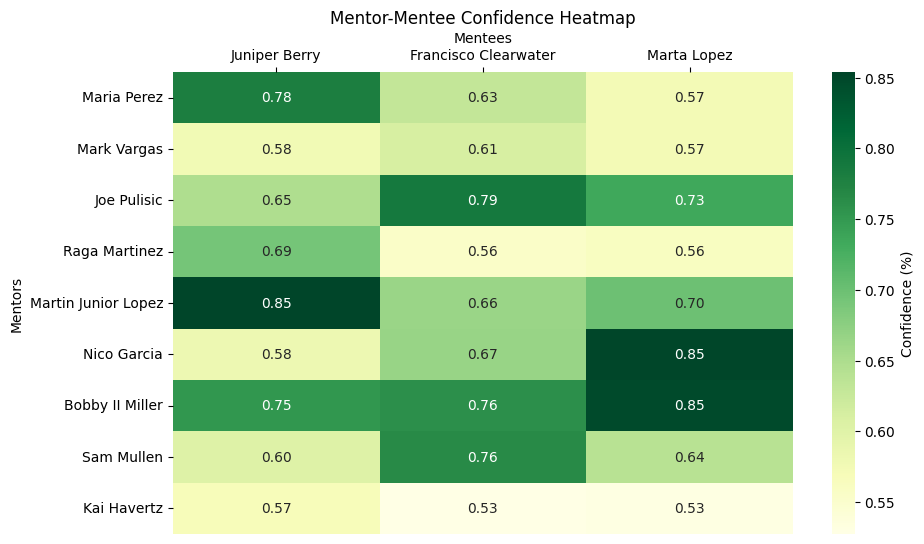

In [51]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_df, annot=True, cmap='YlGn', fmt=".2f", 
            cbar_kws={'label': 'Confidence (%)'})

# Set axis labels and plot title
plt.xlabel('Mentees')
plt.ylabel('Mentors')

# Move x-axis label to the top
heatmap.xaxis.set_label_position('top')
heatmap.xaxis.tick_top()

plt.title('Mentor-Mentee Confidence Heatmap')

# Show the plot
plt.show()